In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Verificando se há dados duplicados:**

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
df.shape

(891, 15)

In [ ]:
df = df.drop_duplicates()

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.shape

# Como o tamanho do conjunto de dados reduziu, pode-se
# concluir que os valores que eram duplicados foram "de base".

(784, 15)

**Verificando se há valores nulos:**

Em sua operação, as árvores de decisão não suportam dados faltantes.

In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# Excluindo todas as colunas que apresentam
# dados faltantes.

df = df.dropna(axis=1)



In [ ]:
df.shape

(784, 11)

In [ ]:
df

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0,5,29.1250,Third,woman,False,no,False
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


**Dados categorizados:**

O modelo de classificação utilizado pelas árvores de decisão no momento não conseguem manejar dados categóricos, o que faz com que devemos transformá-los em dados quantitativos, isto é, números, normalmente adotando por padrão 0 ou 1.

In [ ]:
# Verificando a importância das colunas, como forma de verificar
# se precisam ser mantidas para realizar a análise e passar o dataframe
# a árvore de decisão.

df['survived'].value_counts()

0    461
1    323
Name: survived, dtype: int64

In [ ]:
df['alive'].value_counts()

no     461
yes    323
Name: alive, dtype: int64

In [ ]:
# Percebe que a coluna alive e survived são equivalentes
# de tal modo que os dados de um são os de outra? Desse modo,
# dizer que está vivo implica dizer que sobreviveu, ou seja,
# uma coluna dessas pode ser retirada.

df = df.drop("alive", axis=1)

In [ ]:
df

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alone
0,0,3,male,1,0,7.2500,Third,man,True,False
1,1,1,female,1,0,71.2833,First,woman,False,False
2,1,3,female,0,0,7.9250,Third,woman,False,True
3,1,1,female,1,0,53.1000,First,woman,False,False
4,0,3,male,0,0,8.0500,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0,5,29.1250,Third,woman,False,False
887,1,1,female,0,0,30.0000,First,woman,False,True
888,0,3,female,1,2,23.4500,Third,woman,False,False
889,1,1,male,0,0,30.0000,First,man,True,True


In [ ]:
# Para transformar as variáveis que temos, sendo boa parte
# categorias, em termos que possam ser passados à árvore de
# decisão, temos que deixá-las em termos numéricos, normalmente
# 1 ou 0. Para tanto, vamos:

# Criando dummies, que servem como bandeiras utilizadas nas árvores
# de decisão que funcionam como rótulos dizendo que tal coisa é uma
# ou outra, a partir de 0 e 1. Como último parâmetro estou falando
# para que exclua a primeira coluna produzida na geração dos dummies,
# que seria relativa às colunas que eu passei abaixo. Poderá ver o
# exemplo sem passar o drop abaixo desse dataframe

df_encoded = pd.get_dummies(df, columns=["class", "who"], drop_first=True)
df_encoded

,survived,pclass,sex,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,3,male,1,0,7.2500,True,False,0,1,1,0
1,1,1,female,1,0,71.2833,False,False,0,0,0,1
2,1,3,female,0,0,7.9250,False,True,0,1,0,1
3,1,1,female,1,0,53.1000,False,False,0,0,0,1
4,0,3,male,0,0,8.0500,True,True,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0,5,29.1250,False,False,0,1,0,1
887,1,1,female,0,0,30.0000,False,True,0,0,0,1
888,0,3,female,1,2,23.4500,False,False,0,1,0,1
889,1,1,male,0,0,30.0000,True,True,0,0,1,0


In [ ]:
# Df produzido sem excluir as primeiras colunas geradas pelo get_dummies.
# Desse modo, conseguimos ver presentes, ao contrário do df acima, as colunas
# "class first" e "who_child".

df_encoded_exemplo = pd.get_dummies(df)
df_encoded_exemplo

,survived,pclass,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman
0,0,3,1,0,7.2500,True,False,0,1,0,0,1,0,1,0
1,1,1,1,0,71.2833,False,False,1,0,1,0,0,0,0,1
2,1,3,0,0,7.9250,False,True,1,0,0,0,1,0,0,1
3,1,1,1,0,53.1000,False,False,1,0,1,0,0,0,0,1
4,0,3,0,0,8.0500,True,True,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,5,29.1250,False,False,1,0,0,0,1,0,0,1
887,1,1,0,0,30.0000,False,True,1,0,1,0,0,0,0,1
888,0,3,1,2,23.4500,False,False,1,0,0,0,1,0,0,1
889,1,1,0,0,30.0000,True,True,0,1,1,0,0,0,1,0


In [ ]:
# Dando sequência ao processo de "descategorização do df", uma vez que
# as árvores não suportam dados categóricos, nota-se que tem de descategorizar
# a coluna gender.

# Substituindo o nome da coluna:

df_encoded.rename(columns={"sex":"gender"}, inplace=True)

In [ ]:
df_encoded.head()

,survived,pclass,gender,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,3,male,1,0,7.2500,True,False,0,1,1,0
1,1,1,female,1,0,71.2833,False,False,0,0,0,1
2,1,3,female,0,0,7.9250,False,True,0,1,0,1
3,1,1,female,1,0,53.1000,False,False,0,0,0,1
4,0,3,male,0,0,8.0500,True,True,0,1,1,0


In [ ]:
# Para que eu realize essa descategorização, eu tenho que mapear os valores,
# ou seja, os dados presentes nessa coluna e atribuir a eles um valor, podendo
# ser de 0 ou 1, vejamos:

# Perceba uma coisa: quando eu utilizo o ponto a partir de um termo ao outro,
# eu estou criando um tipo de conexão, que faz com que forma-se o resultado
# de uma função qualquer a partir do primeiro termo ou a esse algo pode ser
# adicionado, melhor, assimilado, como podemos ver no código abaixo, no qual
# o que está no lado direito do sinal de igualdade, o seu resultado, será
# assilado por aquele que está ao lado esquerdo, sendo isso possível porque
# eu digo que ao resultado eu quero que ele seja armazenado no determinado df
# e, principalmente, na coluna especificada.

df_encoded.gender = df_encoded.gender.map({"female": 1, "male": 0})



In [ ]:
df_encoded.head()

,survived,pclass,gender,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,3,0,1,0,7.2500,True,False,0,1,1,0
1,1,1,1,1,0,71.2833,False,False,0,0,0,1
2,1,3,1,0,0,7.9250,False,True,0,1,0,1
3,1,1,1,1,0,53.1000,False,False,0,0,0,1
4,0,3,0,0,0,8.0500,True,True,0,1,1,0


In [ ]:
# Alterando o caráter booleano das colunas adult_male e alone, para que sejam
# inteiros. Nesse caso, o valor 1 será para o True, enquanto que 0 para o False.

df_encoded.adult_male = df_encoded.adult_male.astype(int)

df_encoded.alone = df_encoded.alone.astype(int)

In [ ]:
df_encoded

,survived,pclass,gender,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,3,0,1,0,7.2500,1,0,0,1,1,0
1,1,1,1,1,0,71.2833,0,0,0,0,0,1
2,1,3,1,0,0,7.9250,0,1,0,1,0,1
3,1,1,1,1,0,53.1000,0,0,0,0,0,1
4,0,3,0,0,0,8.0500,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,1,0,5,29.1250,0,0,0,1,0,1
887,1,1,1,0,0,30.0000,0,1,0,0,0,1
888,0,3,1,1,2,23.4500,0,0,0,1,0,1
889,1,1,0,0,0,30.0000,1,1,0,0,1,0


**Definindo o corte das folhas da árvore de decisão:**

O corte das árvores da decisão não são tomados de forma aleatória, mas a partir de um critério, que se relaciona a sepação do conjunto de dados em quartis, calculando-se posteriormente a proporção da quantidade de classes bem como seu valor - True ou False -, realizando com isso o cálculo de Gini. A partir dele, aquele segmento que apresentar um valor de Gini próximo de 0, será onde realizaremos o corte, vejamos nas figuras a seguir:

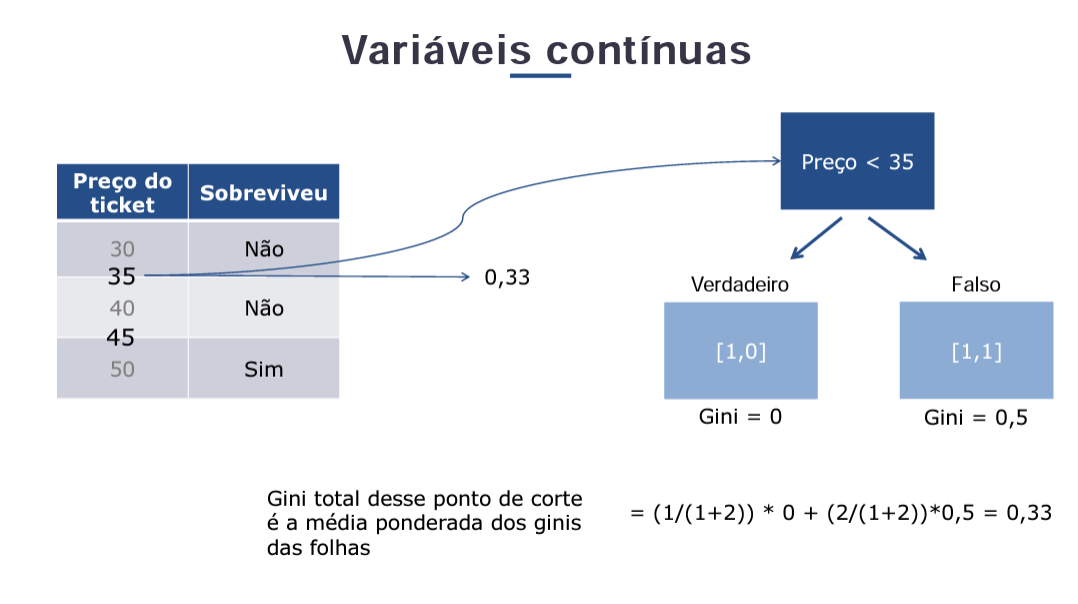

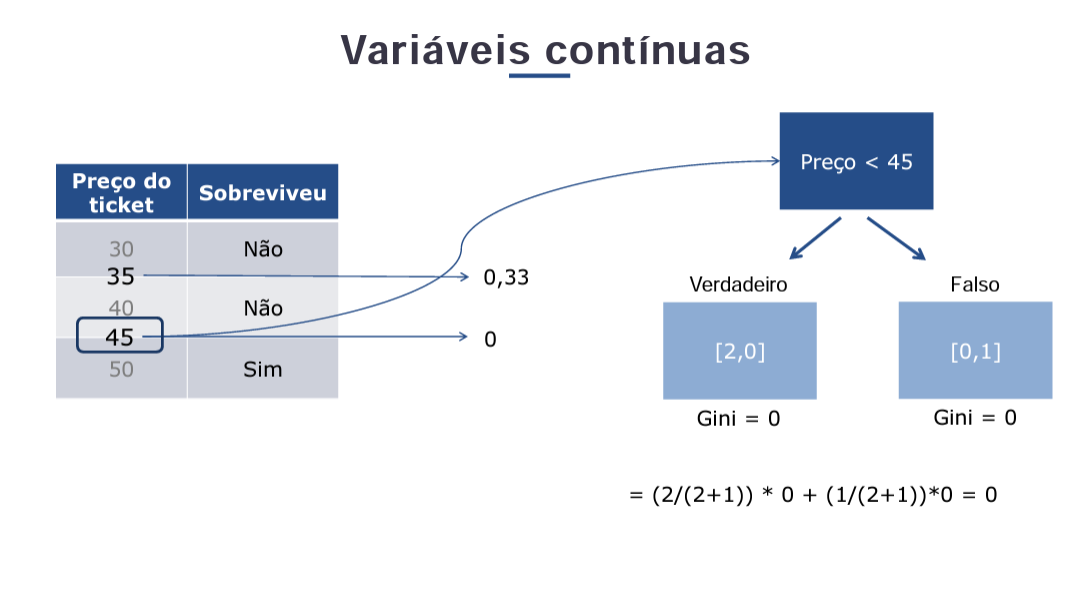

**Treinamento das IA's:**

Durante o treinamento da IA, utilizada no esquema de classificação das árvores de decisão, temos que ter a preocaução do nível de treinamento da máquina, a qual não deve ser sub-treinada - underfit - e nem sobre-treinada - overfit -, mas sim equilibrada. O problema no primeiro caso é que estando pouco treinada a sua aferição irá ser afetada negativamente, enquanto que no segundo, por sua vez, o excesso de treinamento pode produzir um viés, prejudicando em muito quando o algoritimo tiver que analisar dados que anteriormente não "visualizou", treinou. Desse modo, o ideal é um equilíbrio entre os dois mundos, de tal modo que realiza uma segmentação no conjunto de dados contraídos, separando-os apenas para treinamento e para teste.

**Graficamente, temos o que foi dito:**

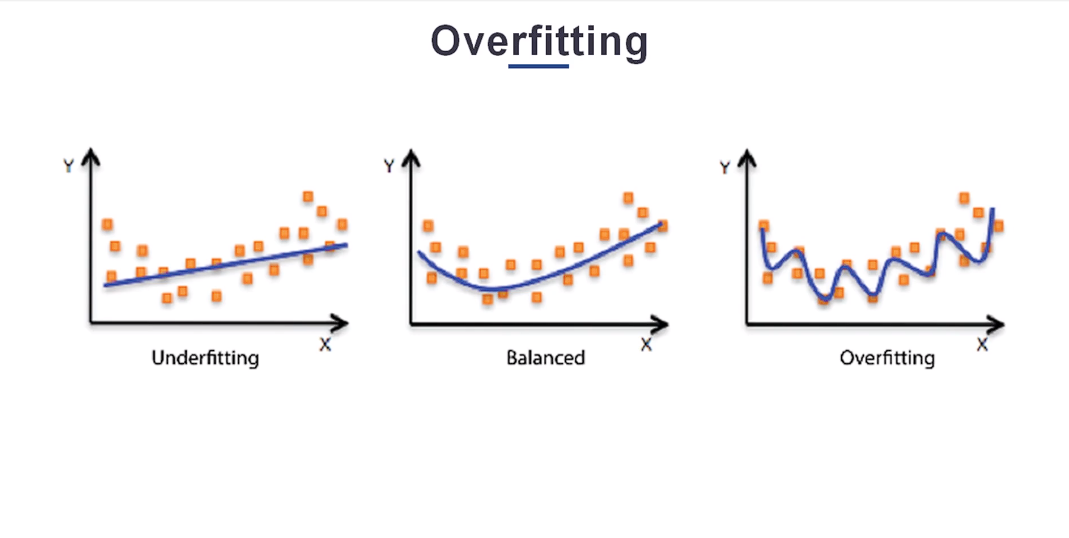

**Acurácia:**

Como forma de aferirmos o nosso modelo, se ele é bom ou não, temos a acurácia, que se consiste em algo como a taxa de acerto. Para calculá-la, podemos dispor de funções ou no uso de matriz de correlação, que poderá ser vista abaixo. Normalmente na validação do modelo, precisamos compará-lo com um outro, que normalmente de início é um *dummy*, um modelo simples que realizará as mesmas etapas do modelo criado, isto é, que passará tanto pelo treinamento quanto pela previsão. Caso a taxa de acurácia seja inferior, equivalente ou próxima ao do modelo *dummy*, concebe-se que o modelo criado é fraco.

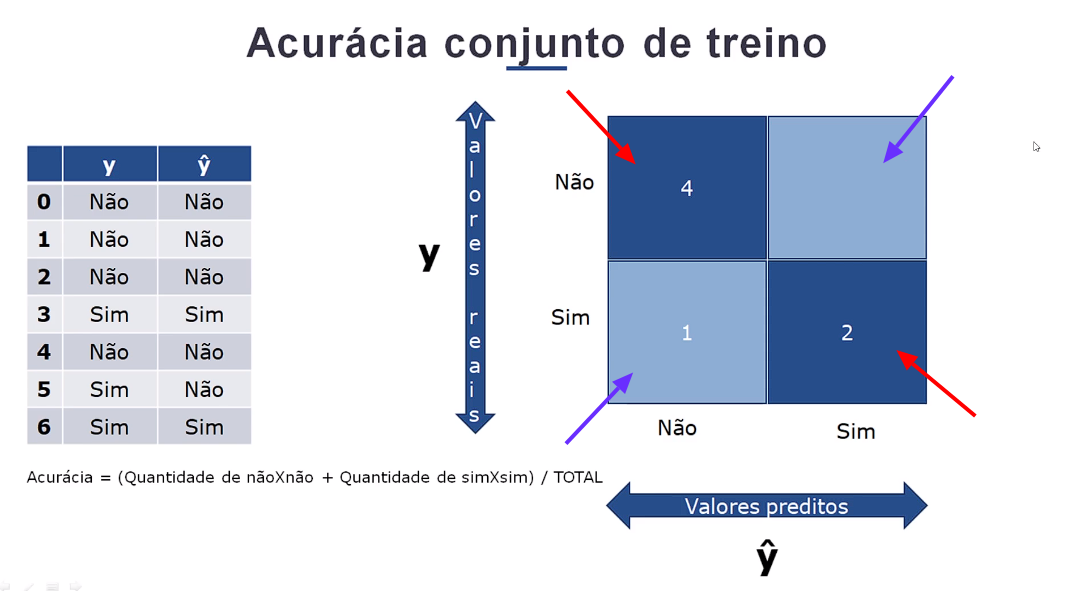

A seta vermelha indica os quadrantes de acertos, enquanto que a seta roxa ou lilás indica os quadrantes de erros. Nesse cenário de matriz de correlação, a maneira com a qual podemos chegar na taxa de acurácia é somar os acertos totais pelo valor total, que aqui, na imagem acima, seria **6/7**, uma vez que temos 6 acertos para 7 valores totais.

Essa matriz de correlação se refere à acurácia do treino, mas o mesmo modelo serve para mensurarmos a acurácia de previsão.

# Elaborando a árvore de decisão:

In [ ]:
# Atribuindo um novo nome ao dataframe que servirá de base
# à criação da árvore de decisão.

df_ship = df_encoded
df_ship.head()

# Separando os dados em seu caráter targer e explicativo:

# A variável target - alvo - que concebe a resposta da principal
# pergunta se é se sobreviveu ou não ao acidente do navio estará em
# y, enquanto que os fatores que possam explicar, os meios pelos quais
# em sequência apresentaram relevância para ter ou não sobrevido estarão em X.

y = df_ship.survived

X = df_ship.drop("survived", axis=1)

**Separando em treino e teste:**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import sklearn.metrics

import matplotlib.pyplot as plt
import seaborn as sns

O parâmetro random_state na função **train_test_split( )** é usado para controlar a aleatoriedade durante a divisão do conjunto de dados em conjuntos de treinamento e teste. Quando você fornece um valor específico para random_state, você garante que a divisão seja reproduzível, ou seja, se você executar o código novamente com o mesmo valor de random_state, obterá a mesma divisão de conjuntos de treinamento e teste.

In [ ]:
# Segmentando os dados na sua porção de treino e teste, para cada elemento, x e y:

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=100)

# Criando a árvore:

# Perguntar ao GPT depois o motivo de eu passar o random_state como parâmetro.
# Imagino que seja por similar motivo que eu o passo na função train_test_split.

clf = DecisionTreeClassifier(random_state=100)

# Treinando os dados.

clf = clf.fit(X_train, y_train)

# Prevendo os dados, isto é, a partir do que
# ele "aprendeu" ao treinar, ele irá realizar os testes,
# por meio dos quais chegará a um resultado, que será
# acertar ou não.

y_predict = clf.predict(X_test)
y_predict

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

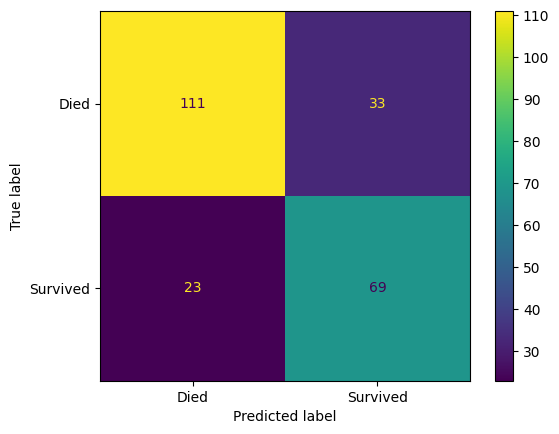

In [ ]:
# Criando a matriz de correlação:

cm = confusion_matrix(y_test, y_predict)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Died", "Survived"])
display.plot()

In [ ]:
# Aferindo a taxa de acerto - acurácia - do modelo.

accuracy_score(y_test, y_predict)

0.7627118644067796

[Text(0.41304154829545453, 0.9705882352941176, 'adult_male <= 0.5\ngini = 0.488\nsamples = 548\nvalue = [317, 231]\nclass = Died'),
 Text(0.19353693181818182, 0.9117647058823529, 'class_Third <= 0.5\ngini = 0.372\nsamples = 231\nvalue = [57, 174]\nclass = Survived'),
 Text(0.11079545454545454, 0.8529411764705882, 'fare <= 28.856\ngini = 0.089\nsamples = 129\nvalue = [6, 123]\nclass = Survived'),
 Text(0.08522727272727272, 0.7941176470588235, 'fare <= 28.231\ngini = 0.16\nsamples = 57\nvalue = [5, 52]\nclass = Survived'),
 Text(0.07386363636363637, 0.7352941176470589, 'fare <= 26.125\ngini = 0.133\nsamples = 56\nvalue = [4, 52]\nclass = Survived'),
 Text(0.0625, 0.6764705882352942, 'fare <= 25.965\ngini = 0.159\nsamples = 46\nvalue = [4, 42]\nclass = Survived'),
 Text(0.03409090909090909, 0.6176470588235294, 'fare <= 13.25\ngini = 0.108\nsamples = 35\nvalue = [2, 33]\nclass = Survived'),
 Text(0.022727272727272728, 0.5588235294117647, 'fare <= 12.825\ngini = 0.198\nsamples = 18\nvalue =

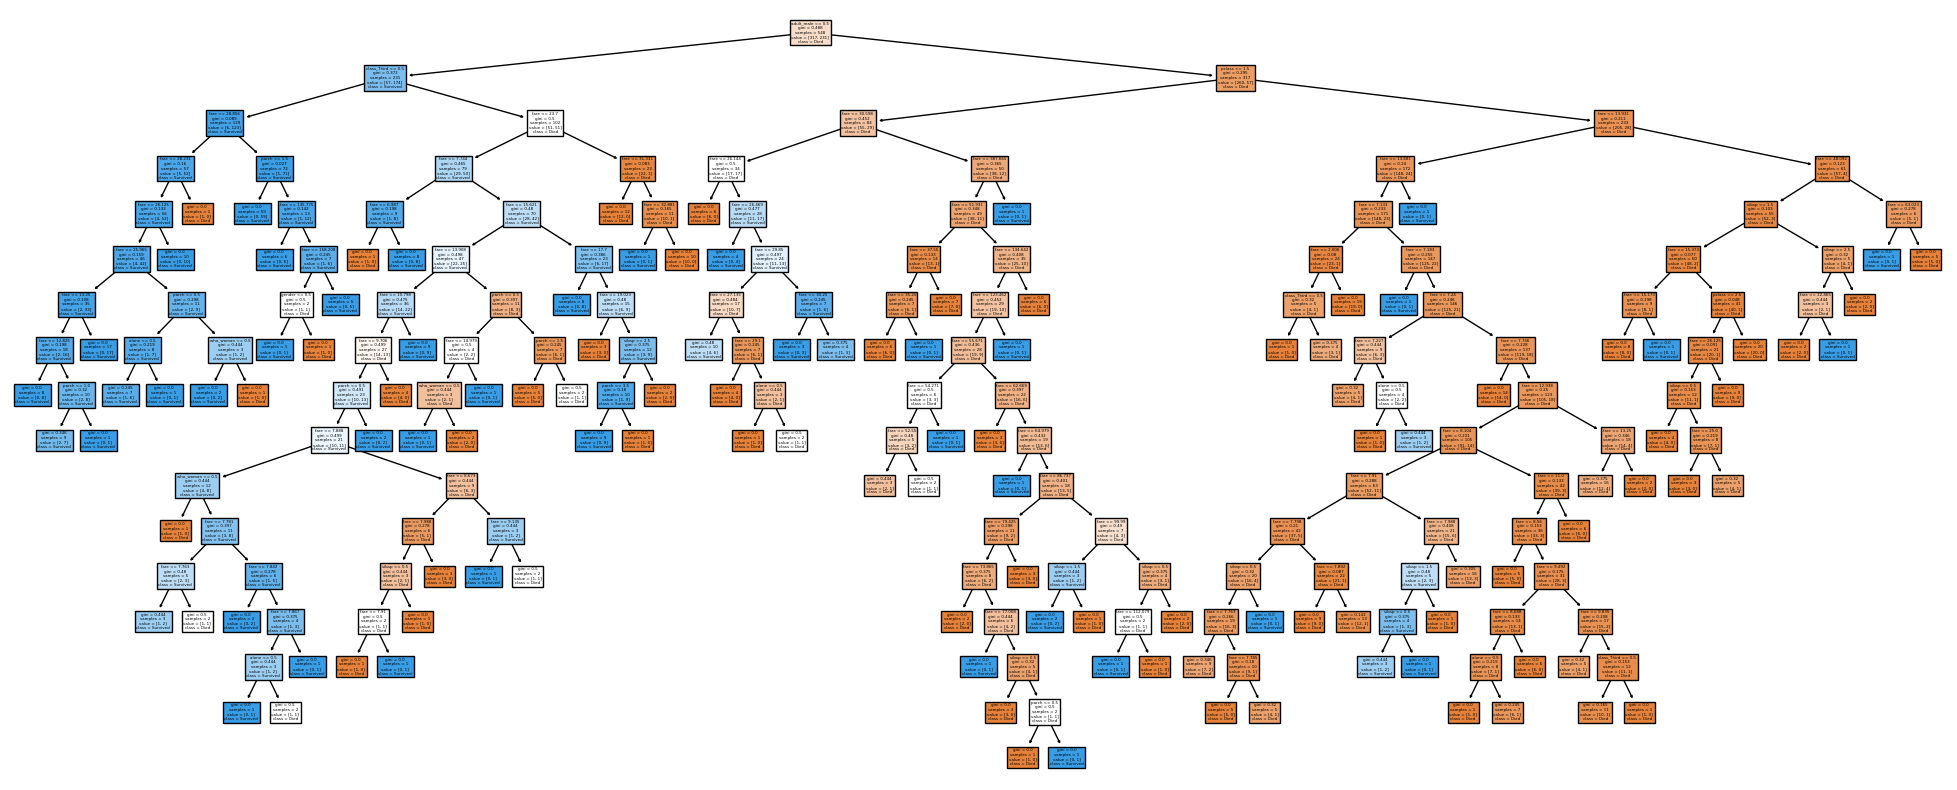

In [ ]:
# Plotando a árvore gerada pelo modelo:

plt.figure(figsize=(25,10))

plot_tree(clf,
         filled=True,
         class_names=["Died", "Survived"],
         feature_names=X.columns)

# Poda da árvore:

A pré-poda (pruning) em árvores de decisão é um processo usado para evitar que a árvore cresça excessivamente durante o treinamento. Árvores de decisão têm uma tendência natural de se ajustar demais aos dados de treinamento, capturando ruídos e padrões específicos dos dados que podem não ser generalizáveis para novos dados. A pré-poda é uma técnica que impõe restrições ao crescimento da árvore durante o processo de construção, ajudando a evitar o sobreajuste (overfitting).

Existem dois tipos principais de poda em árvores de decisão: pré-poda (pruning) e pós-poda (post-pruning). A pré-poda ocorre durante o processo de construção da árvore, enquanto a pós-poda ocorre após a árvore ter sido totalmente construída.

A pré-poda é realizada estabelecendo critérios de parada para o crescimento da árvore. Alguns dos critérios comuns incluem:

1. **Profundidade Máxima da Árvore:** Limitar a profundidade máxima da árvore para evitar que ela cresça demais. Isso significa que a árvore para de se ramificar após atingir um determinado número de níveis.

2. **Número Mínimo de Amostras em um Nó Folha (Leaf):** Impor um limite mínimo para o número de amostras que um nó folha deve ter. Se o número de amostras em um nó for menor que o limite especificado, o nó não será expandido.

3. **Número Mínimo de Amostras em um Nó para Expansão:** Definir um número mínimo de amostras necessário para expandir um nó. Se o número de amostras em um nó for menor que esse limite, o nó não será expandido.

4. **Impureza Mínima para Expansão:** Definir um valor mínimo para a impureza (como Gini ou entropia) que um nó deve ter para ser expandido.

Ao utilizar a pré-poda, a árvore é construída com base nesses critérios, e ramos que não atendem aos critérios de parada são podados durante o processo de construção.

A pré-poda é benéfica para evitar o sobreajuste, melhorar a generalização do modelo e reduzir o tempo de treinamento, já que a árvore não precisa crescer até a sua máxima extensão. No entanto, encontrar os parâmetros adequados para a pré-poda pode exigir experimentação e ajuste.

# Pré-poda:

* Profundidade:

In [ ]:
# Criando a árvore sob a nova condição de possuir uma profundidade máxima:

# O parâmetro que nos traz à profundidade máxima de uma árvore é o
# max_depth, que no caso, aqui, é de 2 nós apenas.

clf = DecisionTreeClassifier(max_depth=2, random_state=100)
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.7923728813559322

[Text(0.5, 0.8333333333333334, 'adult_male <= 0.5\ngini = 0.488\nsamples = 548\nvalue = [317, 231]\nclass = Died'),
 Text(0.25, 0.5, 'class_Third <= 0.5\ngini = 0.372\nsamples = 231\nvalue = [57, 174]\nclass = Survived'),
 Text(0.125, 0.16666666666666666, 'gini = 0.089\nsamples = 129\nvalue = [6, 123]\nclass = Survived'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 102\nvalue = [51, 51]\nclass = Died'),
 Text(0.75, 0.5, 'pclass <= 1.5\ngini = 0.295\nsamples = 317\nvalue = [260, 57]\nclass = Died'),
 Text(0.625, 0.16666666666666666, 'gini = 0.452\nsamples = 84\nvalue = [55, 29]\nclass = Died'),
 Text(0.875, 0.16666666666666666, 'gini = 0.211\nsamples = 233\nvalue = [205, 28]\nclass = Died')]

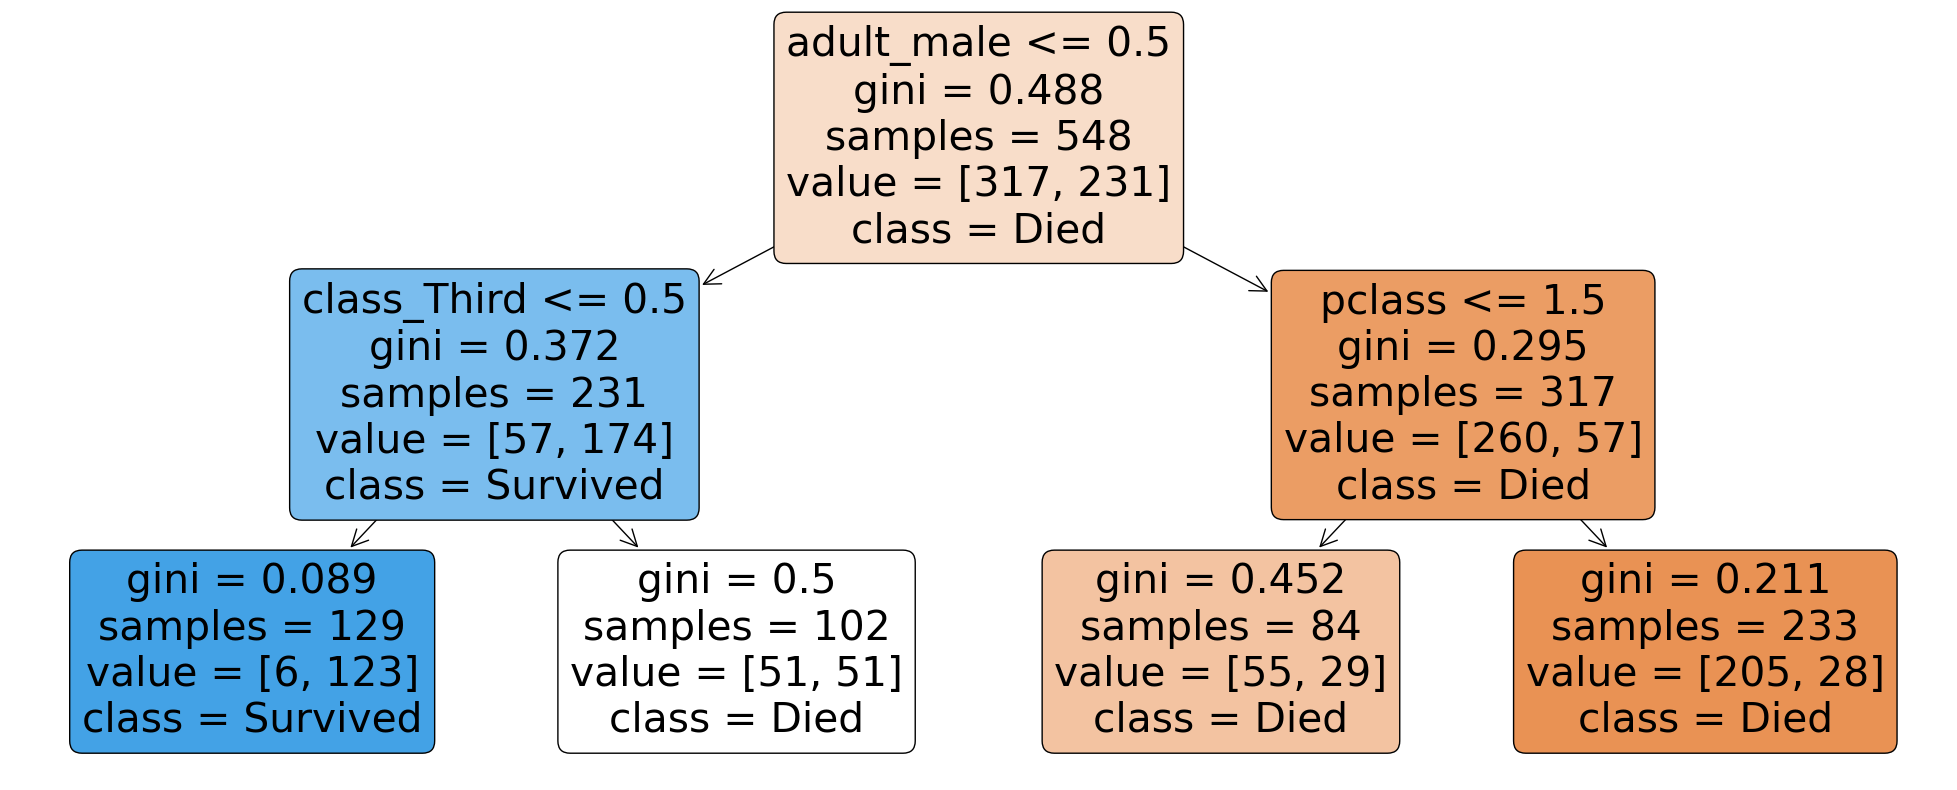

In [ ]:
# Plotando a árvore gerada a partir do novo modelo, considerando
# o máximo de profundidade de uma árvore - pré-poda:

plt.figure(figsize=(25,10))

plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=["Died", "Survived"],
         feature_names=X.columns)

Pode-se notar que tanto o valor da acurácia, em relação à anterior, melhorou quanto a visualização gráfica da árvore.

* Quantidade mínima de amostras:

In [ ]:
# Criando a árvore sob a nova condição de possuir um valor mínimo de amostra:

# O parâmetro que se refere ao nível minímo de amostra é o min_samples_leaf,
# o qual determina a quantidade mínima que tem de haver de dados, como amostra,
# presentes numa folha da árvore de decisão.

clf = DecisionTreeClassifier(min_samples_leaf=8, random_state=100)
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.7838983050847458

[Text(0.4476744186046512, 0.9583333333333334, 'adult_male <= 0.5\ngini = 0.488\nsamples = 548\nvalue = [317, 231]\nclass = Died'),
 Text(0.23255813953488372, 0.875, 'class_Third <= 0.5\ngini = 0.372\nsamples = 231\nvalue = [57, 174]\nclass = Survived'),
 Text(0.13953488372093023, 0.7916666666666666, 'fare <= 28.856\ngini = 0.089\nsamples = 129\nvalue = [6, 123]\nclass = Survived'),
 Text(0.09302325581395349, 0.7083333333333334, 'who_woman <= 0.5\ngini = 0.16\nsamples = 57\nvalue = [5, 52]\nclass = Survived'),
 Text(0.06976744186046512, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = Survived'),
 Text(0.11627906976744186, 0.625, 'fare <= 25.965\ngini = 0.19\nsamples = 47\nvalue = [5, 42]\nclass = Survived'),
 Text(0.06976744186046512, 0.5416666666666666, 'fare <= 13.25\ngini = 0.124\nsamples = 30\nvalue = [2, 28]\nclass = Survived'),
 Text(0.046511627906976744, 0.4583333333333333, 'fare <= 12.825\ngini = 0.198\nsamples = 18\nvalue = [2, 16]\nclass = Survived'),
 Text(0.023255

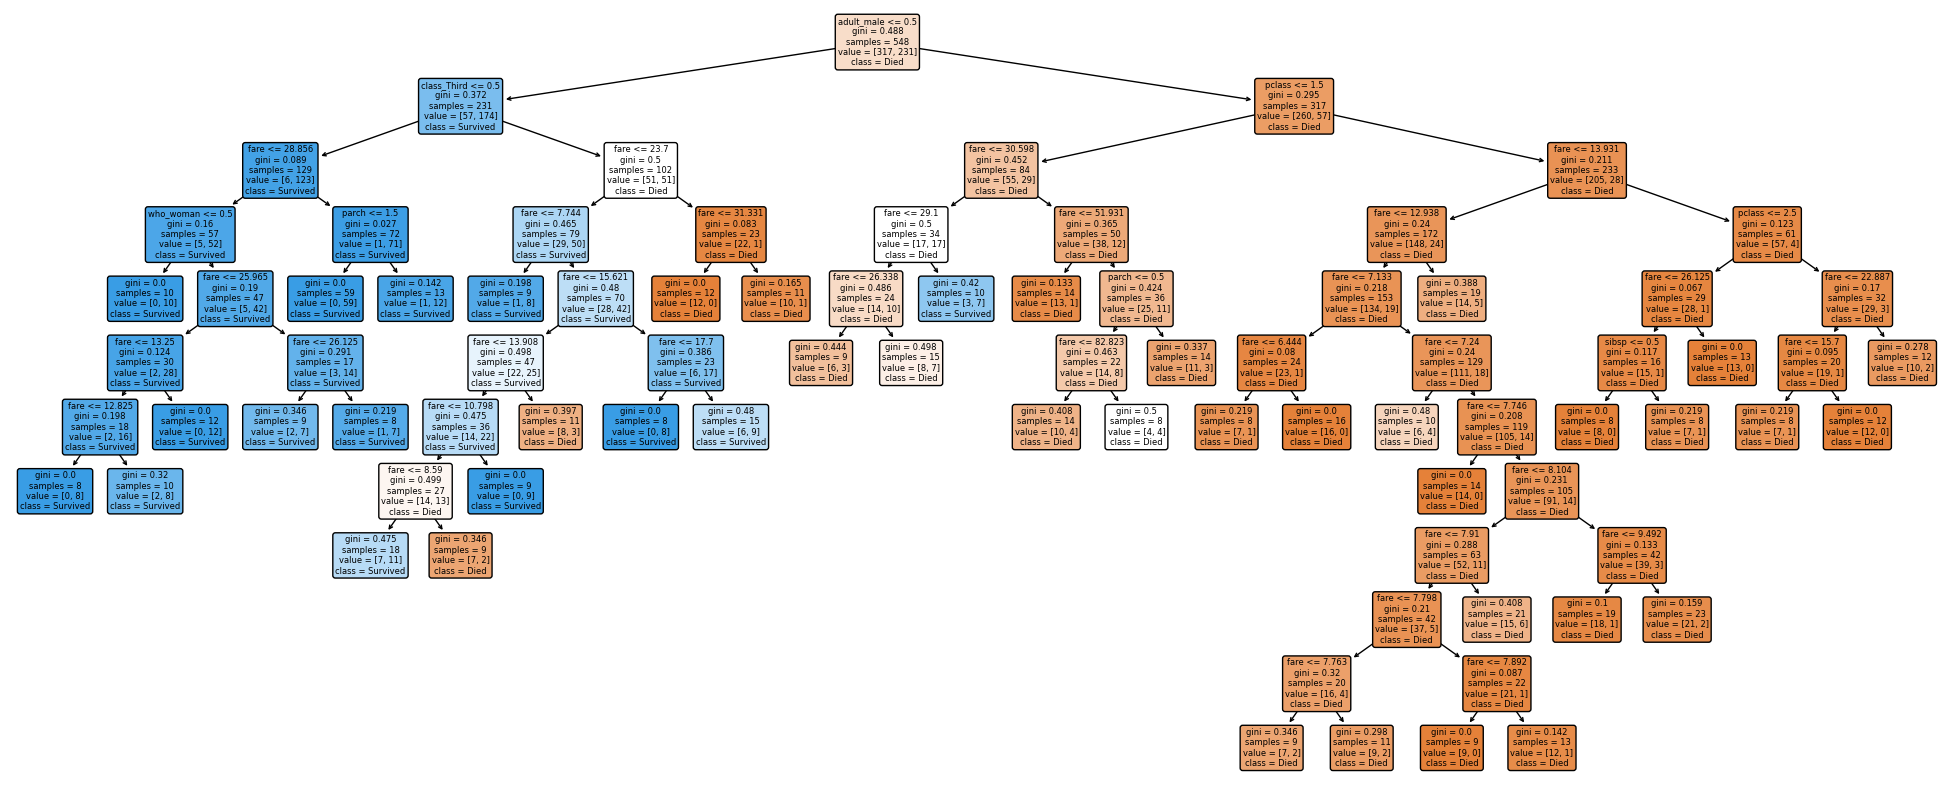

In [ ]:
# Plotando a árvore gerada a partir do novo modelo, considerando o método de
# valor mínimo de amostras do pré-poda :

plt.figure(figsize=(25,10))

plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=["Died", "Survived"],
         feature_names=X.columns)

* Quantidade mínima de amostras e de profundidade - combinando os dois requisitos:

In [ ]:
clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, random_state=100)
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)



0.7838983050847458

[Text(0.4476744186046512, 0.9444444444444444, 'adult_male <= 0.5\ngini = 0.488\nsamples = 548\nvalue = [317, 231]\nclass = Died'),
 Text(0.23255813953488372, 0.8333333333333334, 'class_Third <= 0.5\ngini = 0.372\nsamples = 231\nvalue = [57, 174]\nclass = Survived'),
 Text(0.13953488372093023, 0.7222222222222222, 'fare <= 28.856\ngini = 0.089\nsamples = 129\nvalue = [6, 123]\nclass = Survived'),
 Text(0.09302325581395349, 0.6111111111111112, 'who_woman <= 0.5\ngini = 0.16\nsamples = 57\nvalue = [5, 52]\nclass = Survived'),
 Text(0.06976744186046512, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = Survived'),
 Text(0.11627906976744186, 0.5, 'fare <= 25.965\ngini = 0.19\nsamples = 47\nvalue = [5, 42]\nclass = Survived'),
 Text(0.06976744186046512, 0.3888888888888889, 'fare <= 13.25\ngini = 0.124\nsamples = 30\nvalue = [2, 28]\nclass = Survived'),
 Text(0.046511627906976744, 0.2777777777777778, 'fare <= 12.825\ngini = 0.198\nsamples = 18\nvalue = [2, 16]\nclass = Survived'),
 Text

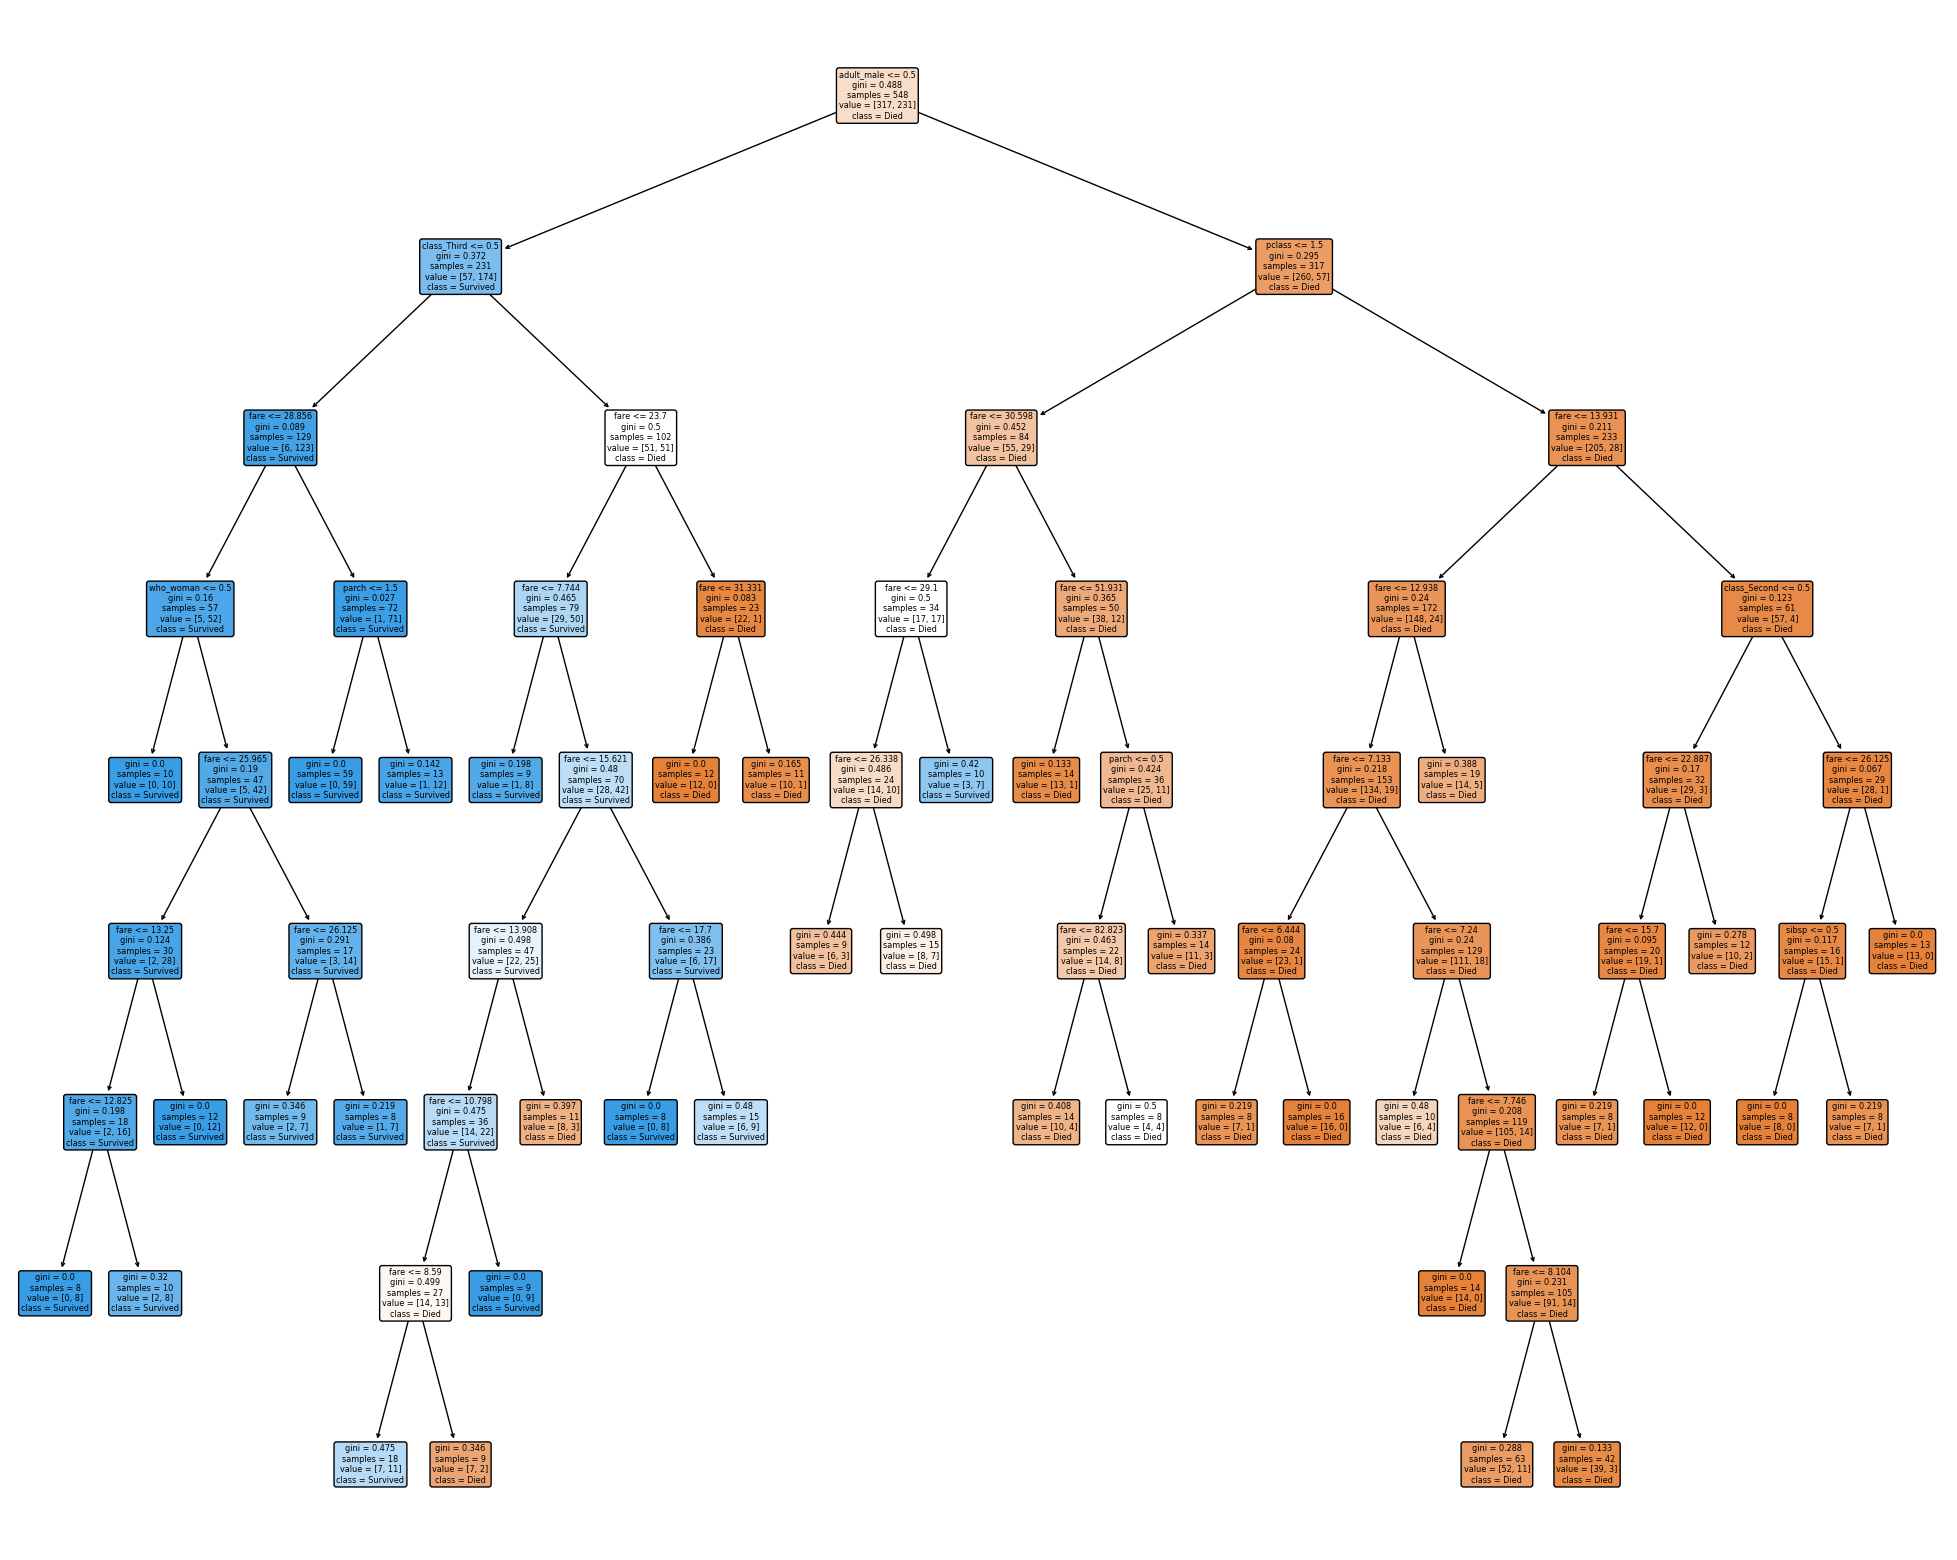

In [ ]:
plt.figure(figsize=(25,20))

plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=["Died", "Survived"],
         feature_names=X.columns)

# Pós-Poda:

In [ ]:
# A técnica de poda utilizada abaixo se dá por meio dos
# ccp_alphas, o qual é responsável por limitar a quantidade
# de nós qur a árvore de decisão terá.

# Quando passo um valor ao random_state, eu quero garantir
# que a reprodutibilidade nos resultados da criação da árvore,
# pois de outro modo os resultados gerados e sua produção
# seriam aleatórias.

# A função cost_complexity_pruning_path calcula os caminhos de poda por
# complexidade de custo. Em termos simples, ela ajuda a encontrar os valores
# de alfa (parâmetro de complexidade) que permitem a poda da árvore para melhorar
# o desempenho geral e evitar overfitting.

# O último trecho de código se relaciona à obtenção dos valores de ccp_aplha,
# responsável pela limitação de quantidade de nós que a árvore terá, bem como
# das impurezas.

clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.get('ccp_alphas'), path.get('impurities')

In [ ]:
# Aqui eu estou criando uma lista por meio do ciclo for de ccp_aplha
# que percorre os ccp_alphas obtidos. O objetivo disso é saber todos os
# ccp_alphas envolvidos, me mostrando depois qual é aquele que compreende
# uma taxa de acurácia boa tanto para treinamento quanto para teste.

clfs = []

for ccp_alpha in ccp_alphas:

  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

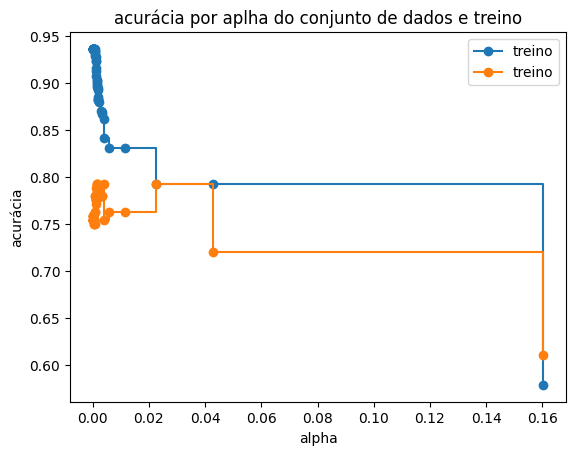

In [ ]:
# Criando a visualização gráfica que me mostra a dinâmica dos ccp_alphas
# por acurácia de teste ou treino.

train_scores = [clf.score(X_train, y_train) for clf in clfs]
tests_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()

ax.set_xlabel("alpha")
ax.set_ylabel("acurácia")
ax.set_title("acurácia por aplha do conjunto de dados e treino")
ax.plot(ccp_alphas, train_scores, marker="o", label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, tests_scores, marker="o", label="treino",
        drawstyle="steps-post")

ax.legend()
plt.show()



In [ ]:
# Retornando um dataframe que me mostra o valor da acurácia por ccp_aplha utilizado.

pd.DataFrame({"alpha": ccp_alphas.tolist(), "score": tests_scores})

,alpha,score
0,0.000000,0.758475
1,0.000028,0.758475
2,0.000065,0.758475
3,0.000065,0.758475
4,0.000115,0.758475
5,0.000122,0.754237
6,0.000122,0.754237
7,0.000142,0.754237
8,0.000160,0.754237
9,0.000162,0.754237


In [ ]:
# Criando uma árvore de decisão podada, isto é, que passou por esse
# processo de poda, com o seu respecti o valor ccp_alpha mais eficaz.

clf_podada = DecisionTreeClassifier(random_state=100, ccp_alpha=0.001645)

clf_podada = clf_podada.fit(X_train, y_train)
y_predict = clf_podada.predict(X_test)
round(accuracy_score(y_test, y_predict),2)

# Ela apresenta essa acurácia.

0.79

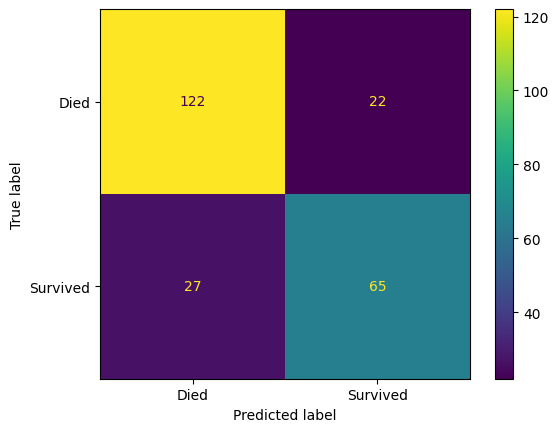

In [ ]:
# Criando a matriz de correlação a partir da nova árvore gerada.

cm = confusion_matrix(y_test, y_predict)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Died", "Survived"])
display.plot()

# Prós e contras das árvores de decisão:

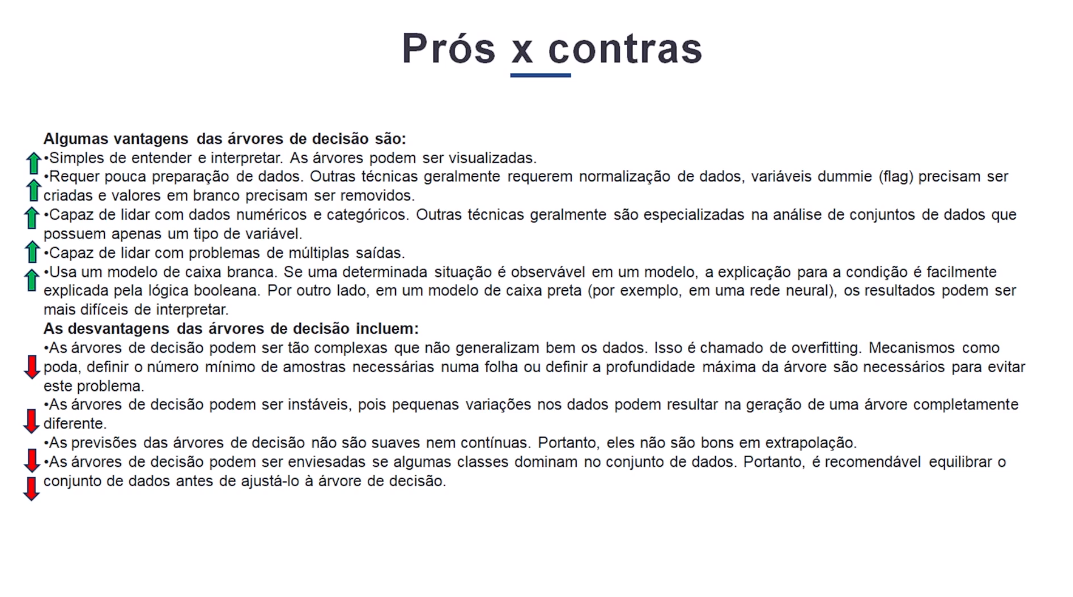